# EX14 ÌîÑÎ°úÏ†ùÌä∏ : Ï£ºÏãù ÏòàÏ∏°Ïóê ÎèÑÏ†ÑÌï¥ Î≥¥Ïûê

### ÌïôÏäµ Î™©Ìëú

-----------------------

* ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏÑ±Í≥º ÏïàÏ†ïÏ†Å(Stationary) ÏãúÍ≥ÑÏó¥Ïùò Í∞úÎÖêÏùÑ Ïù¥Ìï¥ÌïúÎã§.
* ARIMA Î™®Îç∏ÏùÑ Íµ¨ÏÑ±ÌïòÎäî AR, MA, DiffencingÏùò Í∞úÎÖêÏùÑ Ïù¥Ìï¥ÌïòÍ≥† Í∞ÑÎã®Ìïú ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©Ìï¥ Î≥∏Îã§.
* Ïã§Ï†ú Ï£ºÏãù Îç∞Ïù¥ÌÑ∞Ïóê ARIMAÎ•º Ï†ÅÏö©Ìï¥ÏÑú ÏòàÏ∏° Ï†ïÌôïÎèÑÎ•º ÌôïÏù∏Ìï¥ Î≥∏Îã§.

### ‚úÖ Î™©Ï∞®

-------------------

**STEP 1** : ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

**STEP 2** : Í∞ÅÏ¢Ö Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ

**STEP 3** : ÏãúÍ≥ÑÏó¥ ÏïàÏ†ïÏÑ± Î∂ÑÏÑù

**STEP 4** : ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±

**STEP 5** : Ï†ÅÏ†ï ARIMA Î™®Ïàò Ï∞æÍ∏∞

**STEP 6** : ARIMA Î™®Îç∏ ÌõàÎ†®Í≥º ÌÖåÏä§Ìä∏

**STEP 7** : Îã§Î•∏ Ï£ºÏãù Ï¢ÖÎ™© ÏòàÏ∏°Ìï¥ Î≥¥Í∏∞

---------------------

### STEP 1 : ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

------------------------------

* ÏπºÎüº Ï¢ÖÎ•ò: Date, Open, High, Low, Close, Adj Close, Volume
* ÎÇ†ÏßúÎ≥ÑÎ°ú ÏãúÏûëÍ∞Ä(Open), ÏµúÍ≥†Í∞Ä(High), ÏµúÏ†ÄÍ∞Ä(Low), Ï¢ÖÍ∞Ä(Close), ÏàòÏ†ïÏ¢ÖÍ∞Ä(Adj Close), Í±∞ÎûòÎüâ(Volume)Ïù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùå.
* Ï¢ÖÍ∞Ä(Close)Îßå ÏÇ¨Ïö©ÌïòÍ≤†Ïùå (Ï£ºÏãù ÏãúÏû•ÏùÄ Ï†ïÌï¥ÏßÑ ÏãúÍ∞Ñ ÎèôÏïàÎßå Í±∞ÎûòÍ∞Ä Í∞ÄÎä•. Ï¢ÖÍ∞ÄÎûÄ ÌïòÎ£®Ïùò Ïû•Ïù¥ ÎßàÍ∞êÌïòÏòÄÏùÑ ÎïåÏùò Í∞ÄÍ≤©.)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import os


In [3]:
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
df.head()

Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2020-05-18  47950.0  49100.0  47600.0  48800.0  46788.835938  20481981
2020-05-19  50100.0  50500.0  49700.0  50300.0  48227.015625  25168295
2020-05-20  50000.0  50200.0  49800.0  50000.0  47939.382813  14896899
2020-05-21  50300.0  50400.0  49850.0  49950.0  47891.437500  14949266
2020-05-22  49600.0  49800.0  48600.0  48750.0  46740.894531  19706284

In [4]:
# Time Series ÏÉùÏÑ±
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
# Ïó¨Îü¨ Îç∞Ïù¥ÌÑ∞ Ï§ëÏóê Ï¢ÖÍ∞Ä(Ï£ºÏãù ÏãúÏû•Ïù¥ ÎßàÍ∞êÌñàÏùÑ ÎïåÏùò Ï£ºÏãù Í∞ÄÍ≤©)Îßå ÏÇ¨Ïö©
ts = df['Close']

ts.head()

Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

### STEP 2 : Í∞ÅÏ¢Ö Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ   

------------------------------

* Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
* Î°úÍ∑∏ Î≥ÄÌôò

In [5]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
# Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎã§Î©¥ Ïù¥Î•º Î≥¥Í∞ÑÌïòÍ∏∞, Î≥¥Í∞Ñ Í∏∞Ï§ÄÏùÄ timeÏùÑ ÏÑ†ÌÉù
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•

Series([], Name: Close, dtype: float64)

In [6]:
# Î°úÍ∑∏ Î≥ÄÌôò ÏãúÎèÑ 
ts_log = np.log(ts)

### STEP 3 : ÏãúÍ≥ÑÏó¥ ÏïàÏ†ïÏÑ± Î∂ÑÏÑù

------------------------------------

* Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
* Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
* ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥(Time Series Decomposition)
* Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏

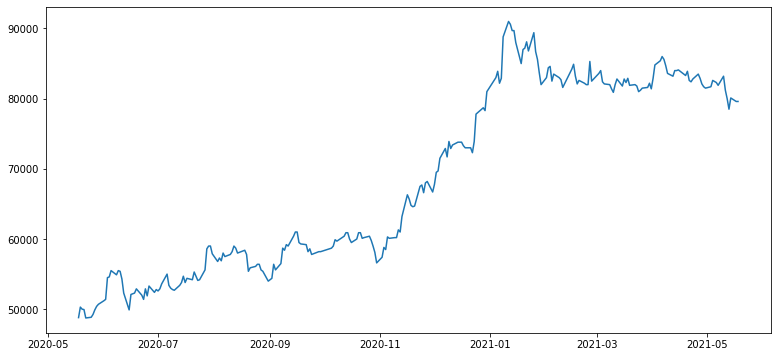

In [7]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize']=13, 6

plt.plot(ts)

In [8]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # Ïù¥ÎèôÌèâÍ∑† ÏãúÍ≥ÑÏó¥
    rolstd = timeseries.rolling(window=window).std()    # Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞® ÏãúÍ≥ÑÏó¥

     # ÏõêÎ≥∏ÏãúÍ≥ÑÏó¥, Ïù¥ÎèôÌèâÍ∑†, Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞®Î•º plotÏúºÎ°ú ÏãúÍ∞ÅÌôîÌï¥ Î≥∏Îã§.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

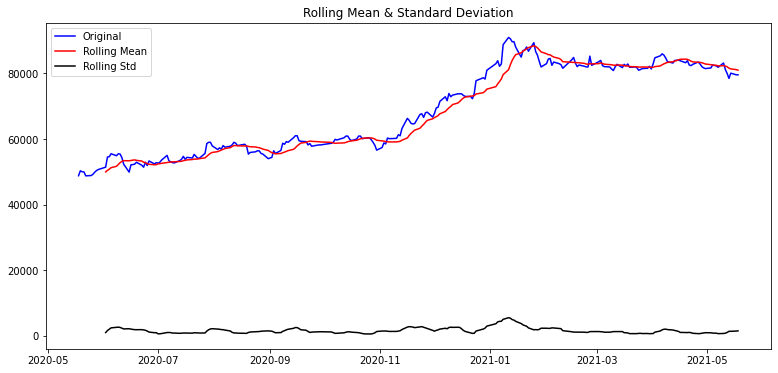

In [9]:
plot_rolling_statistics(ts, window=12)

statsmodels Ìå®ÌÇ§ÏßÄÎäî RÏóêÏÑú Ï†úÍ≥µÌïòÎäî ÌÜµÍ≥ÑÍ≤ÄÏ†ï, ÏãúÍ≥ÑÏó¥Î∂ÑÏÑù Îì±Ïùò Í∏∞Îä•ÏùÑ ÌååÏù¥Ïç¨ÏóêÏÑúÎèÑ Ïù¥Ïö©Ìï† Ïàò ÏûàÎèÑÎ°ù ÌïòÎäî Í∞ïÎ†•Ìïú ÌÜµÍ≥Ñ Ìå®ÌÇ§ÏßÄÏù¥Îã§.

ÏïÑÎûòÎäî statsmodels Ìå®ÌÇ§ÏßÄÏóêÏÑú Ï†úÍ≥µÌïòÎäî **adfuller Î©îÏÜåÎìúÎ•º Ïù¥Ïö©**Ìï¥ Ï£ºÏñ¥ÏßÑ **timeseries**Ïóê ÎåÄÌïú **Augmented Dickey-Fuller Test**Î•º ÏàòÌñâÌïòÎäî ÏΩîÎìú

In [10]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels Ìå®ÌÇ§ÏßÄÏóêÏÑú Ï†úÍ≥µÌïòÎäî adfuller Î©îÏÜåÎìúÎ•º Ìò∏Ï∂úÌï©ÎãàÎã§.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller Î©îÏÜåÎìúÍ∞Ä Î¶¨ÌÑ¥Ìïú Í≤∞Í≥ºÎ•º Ï†ïÎ¶¨ÌïòÏó¨ Ï∂úÎ†•Ìï©ÎãàÎã§.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [11]:
augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -1.222649
p-value                          0.663778
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


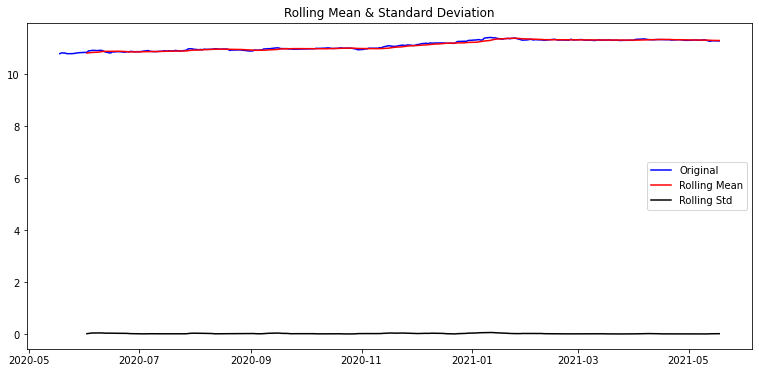

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


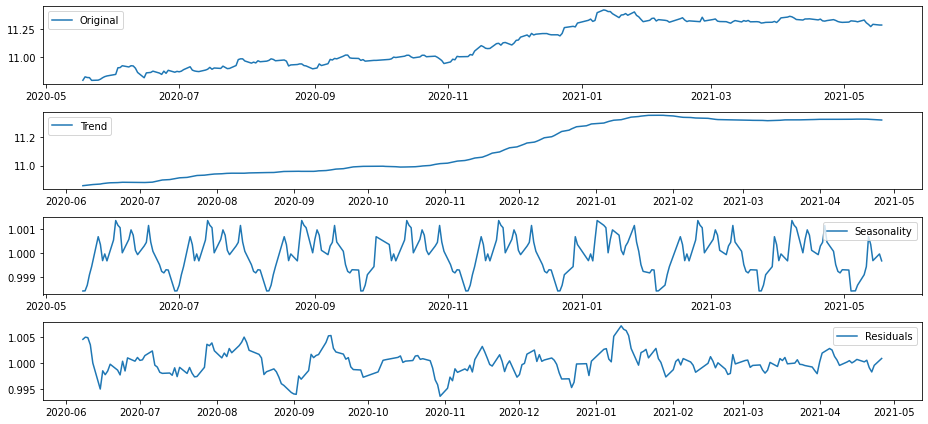

In [12]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
plot_rolling_statistics(ts_log, window=12)

#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [13]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


## STEP 4 : ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±

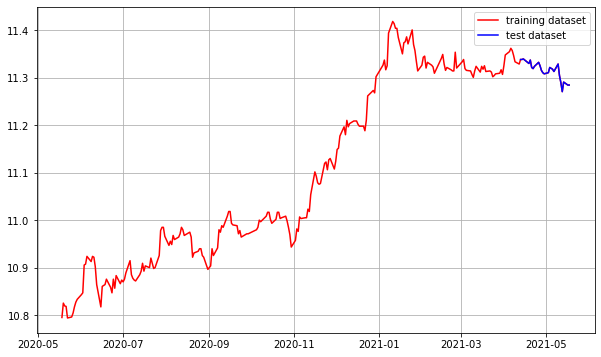

In [14]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

## STEP 5 : Ï†ÅÏ†ï ARIMA Î™®Ïàò Ï∞æÍ∏∞

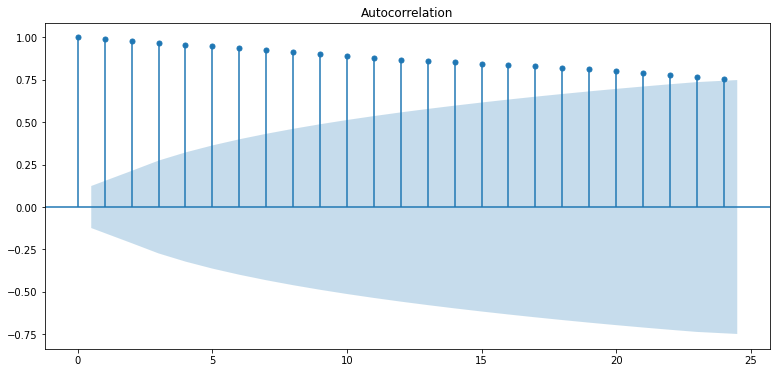

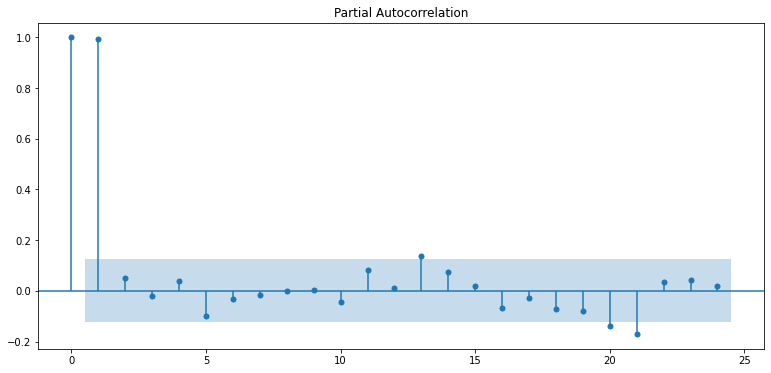

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.029320e+01
p-value                        3.525823e-18
#Lags Used                     7.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


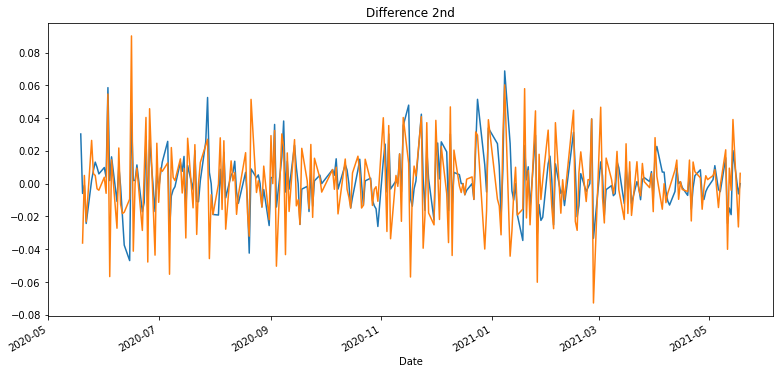

In [16]:
# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# ÌòπÏãú ÌïÑÏöîÌïú Í≤ΩÏö∞ 2Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

## STEP 6 : ARIMA Î™®Îç∏ ÌõàÎ†®Í≥º ÌÖåÏä§Ìä∏

In [17]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  224
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 585.396
Method:                       css-mle   S.D. of innovations              0.018
Date:                Tue, 07 Sep 2021   AIC                          -1164.792
Time:                        08:55:42   BIC                          -1154.557
Sample:                             1   HQIC                         -1160.661
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0024      0.001      1.978      0.048    2.17e-05       0.005
ar.L1.D.Close     0.0168      0.067      0.250      0.803      -0.115       0.148
                                    Root

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

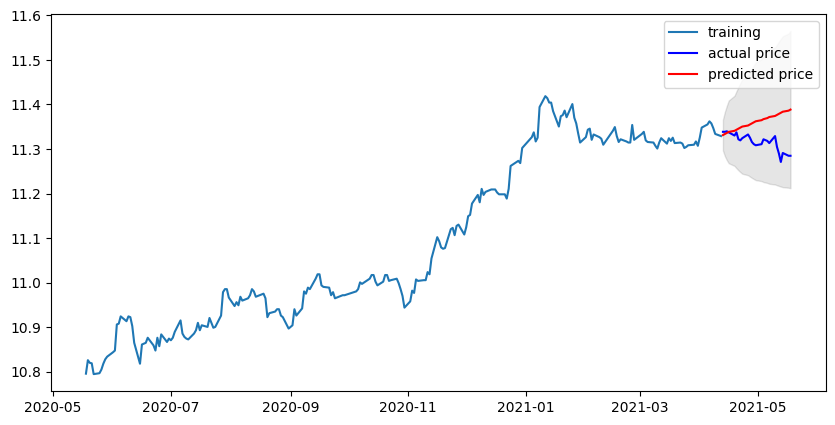

In [18]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  22087366.126154922
MAE:  3791.3511527213127
RMSE:  4699.719792301976
MAPE: 4.68%


## STEP 7 : Îã§Î•∏ Ï£ºÏãù Ï¢ÖÎ™© ÏòàÏ∏°Ìï¥ Î≥¥Í∏∞ 

--------------

#### 1) kakao
#### 2) netflix
#### 3) naver
----------------------

### 1) kakao
**Ïπ¥Ïπ¥Ïò§**ÏóêÎåÄÌïú Ï£ºÏãùÏùÑ ÏòàÏ∏°Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§!

In [2]:
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/new_data/kakao.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2020-09-07    78400.0
2020-09-08    78000.0
2020-09-09    76800.0
2020-09-10    77100.0
2020-09-11    75800.0
Name: Close, dtype: float64

In [3]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
# Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎã§Î©¥ Ïù¥Î•º Î≥¥Í∞ÑÌïòÍ∏∞, Î≥¥Í∞Ñ Í∏∞Ï§ÄÏùÄ timeÏùÑ ÏÑ†ÌÉù
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•

Series([], Name: Close, dtype: float64)

In [4]:
# Î°úÍ∑∏ Î≥ÄÌôò ÏãúÎèÑ 
ts_log = np.log(ts)

In [5]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # Ïù¥ÎèôÌèâÍ∑† ÏãúÍ≥ÑÏó¥
    rolstd = timeseries.rolling(window=window).std()    # Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞® ÏãúÍ≥ÑÏó¥

     # ÏõêÎ≥∏ÏãúÍ≥ÑÏó¥, Ïù¥ÎèôÌèâÍ∑†, Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞®Î•º plotÏúºÎ°ú ÏãúÍ∞ÅÌôîÌï¥ Î≥∏Îã§.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [6]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels Ìå®ÌÇ§ÏßÄÏóêÏÑú Ï†úÍ≥µÌïòÎäî adfuller Î©îÏÜåÎìúÎ•º Ìò∏Ï∂úÌï©ÎãàÎã§.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller Î©îÏÜåÎìúÍ∞Ä Î¶¨ÌÑ¥Ìïú Í≤∞Í≥ºÎ•º Ï†ïÎ¶¨ÌïòÏó¨ Ï∂úÎ†•Ìï©ÎãàÎã§.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [7]:
augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                   0.079773
p-value                          0.964653
#Lags Used                       0.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


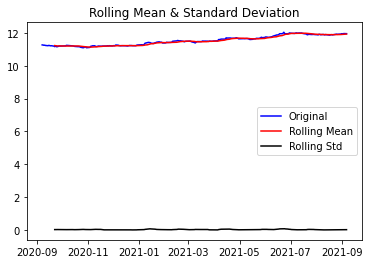

Results of Dickey-Fuller Test:
Test Statistic                  -0.033064
p-value                          0.955711
#Lags Used                       0.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


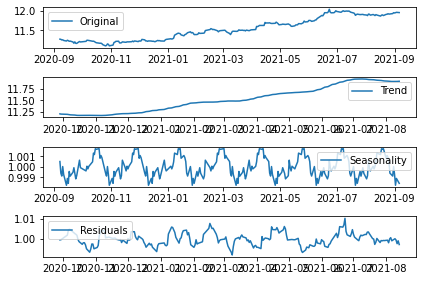

In [8]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
plot_rolling_statistics(ts_log, window=12)

#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [9]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -5.176713
p-value                          0.000010
#Lags Used                       1.000000
Number of Observations Used    216.000000
Critical Value (1%)             -3.460992
Critical Value (5%)             -2.875016
Critical Value (10%)            -2.573952
dtype: float64


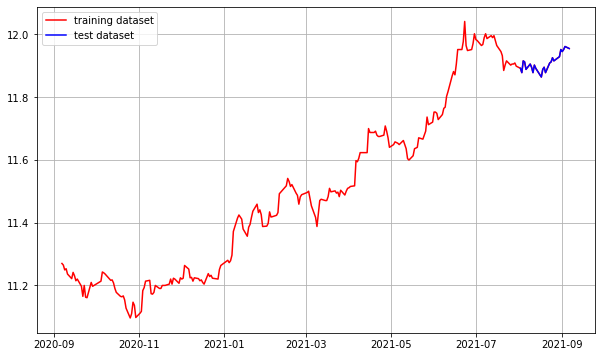

In [10]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

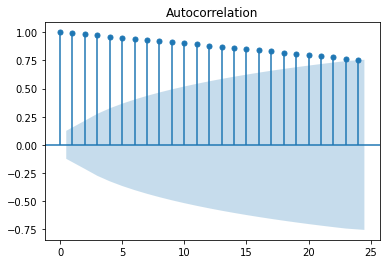

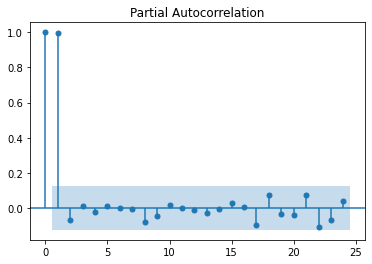

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.472499e+01
p-value                        2.714872e-27
#Lags Used                     0.000000e+00
Number of Observations Used    2.460000e+02
Critical Value (1%)           -3.457215e+00
Critical Value (5%)           -2.873362e+00
Critical Value (10%)          -2.573070e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -8.314052e+00
p-value                        3.721895e-13
#Lags Used                     9.000000e+00
Number of Observations Used    2.360000e+02
Critical Value (1%)           -3.458366e+00
Critical Value (5%)           -2.873866e+00
Critical Value (10%)          -2.573339e+00
dtype: float64


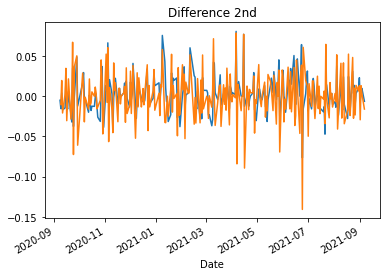

In [12]:
# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# ÌòπÏãú ÌïÑÏöîÌïú Í≤ΩÏö∞ 2Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

In [13]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  222
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 530.013
Method:                       css-mle   S.D. of innovations              0.022
Date:                Tue, 07 Sep 2021   AIC                          -1054.027
Time:                        09:59:29   BIC                          -1043.819
Sample:                             1   HQIC                         -1049.906
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0028      0.002      1.734      0.083      -0.000       0.006
ar.L1.D.Close     0.0841      0.067      1.259      0.208      -0.047       0.215
                                    Root

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

forecast() Î©îÏÜåÎìúÎ•º Ïù¥Ïö©Ìï¥ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Í∞ÑÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°

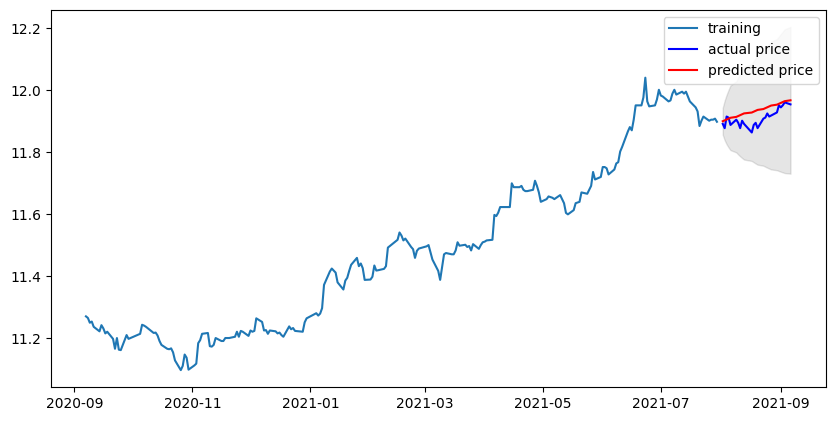

In [14]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º Î°úÍ∑∏ Î≥ÄÌôòÌïòÏó¨ ÏÇ¨Ïö©ÌñàÏúºÎØÄÎ°ú Îã§Ïãú ÏßÄÏàò Î≥ÄÌôòÌï¥Ïïº Ï†ïÌôïÌïú Ïò§Ï∞®Î•º Í≥ÑÏÇ∞Ìï† Ïàò ÏûàÏùå. 
np.exp()Î•º ÌÜµÌï¥ Ï†ÑÎ∂Ä ÏõêÎ≥∏ Ïä§ÏºÄÏùºÎ°ú ÎèåÎ¶∞ ÌõÑ MSE, MAE, RMSE, MAPEÎ•º Í≥ÑÏÇ∞ÌïòÏûê

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  19357558.080198396
MAE:  3720.091829664252
RMSE:  4399.722500362766
MAPE: 2.53%


2.53%Î°ú Ïûò ÏòàÏ∏°Ïù¥ Îêú Í≤É Í∞ôÎã§.

## 2) Netflix

netflixÎèÑ ÏòàÏ∏°ÏùÑ Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [3]:
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/new_data/NFLX.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2020-09-08    507.019989
2020-09-09    500.190002
2020-09-10    480.670013
2020-09-11    482.029999
2020-09-14    476.260010
Name: Close, dtype: float64

In [4]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
# Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎã§Î©¥ Ïù¥Î•º Î≥¥Í∞ÑÌïòÍ∏∞, Î≥¥Í∞Ñ Í∏∞Ï§ÄÏùÄ timeÏùÑ ÏÑ†ÌÉù
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•

Series([], Name: Close, dtype: float64)

In [5]:
# Î°úÍ∑∏ Î≥ÄÌôò ÏãúÎèÑ 
ts_log = np.log(ts)

In [6]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # Ïù¥ÎèôÌèâÍ∑† ÏãúÍ≥ÑÏó¥
    rolstd = timeseries.rolling(window=window).std()    # Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞® ÏãúÍ≥ÑÏó¥

     # ÏõêÎ≥∏ÏãúÍ≥ÑÏó¥, Ïù¥ÎèôÌèâÍ∑†, Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞®Î•º plotÏúºÎ°ú ÏãúÍ∞ÅÌôîÌï¥ Î≥∏Îã§.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [7]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels Ìå®ÌÇ§ÏßÄÏóêÏÑú Ï†úÍ≥µÌïòÎäî adfuller Î©îÏÜåÎìúÎ•º Ìò∏Ï∂úÌï©ÎãàÎã§.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller Î©îÏÜåÎìúÍ∞Ä Î¶¨ÌÑ¥Ìïú Í≤∞Í≥ºÎ•º Ï†ïÎ¶¨ÌïòÏó¨ Ï∂úÎ†•Ìï©ÎãàÎã§.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [8]:
augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -2.853206
p-value                          0.051066
#Lags Used                       4.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


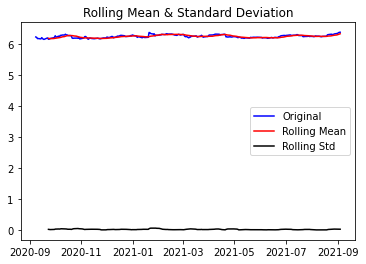

Results of Dickey-Fuller Test:
Test Statistic                  -2.880521
p-value                          0.047660
#Lags Used                       4.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


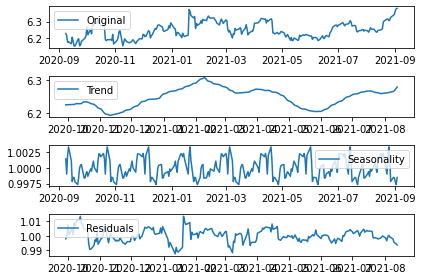

In [9]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
plot_rolling_statistics(ts_log, window=12)

#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [10]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -5.840038e+00
p-value                        3.796297e-07
#Lags Used                     0.000000e+00
Number of Observations Used    2.200000e+02
Critical Value (1%)           -3.460428e+00
Critical Value (5%)           -2.874769e+00
Critical Value (10%)          -2.573821e+00
dtype: float64


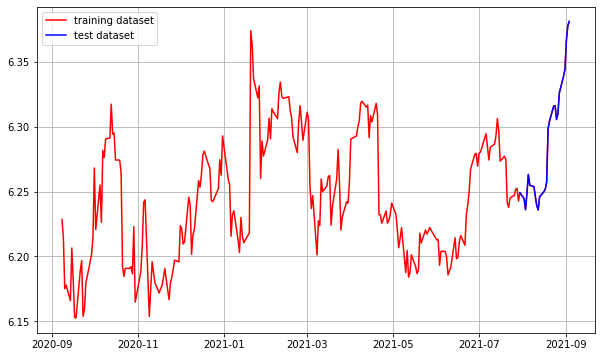

In [11]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

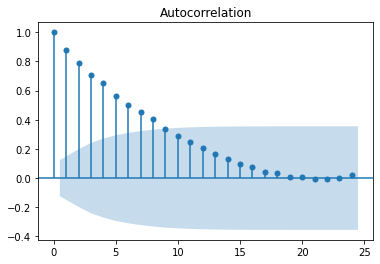

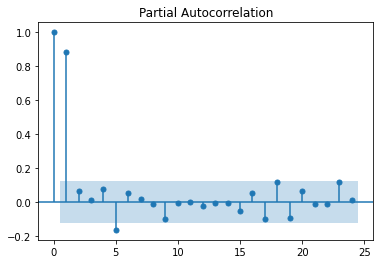

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -7.561079e+00
p-value                        3.008962e-11
#Lags Used                     4.000000e+00
Number of Observations Used    2.450000e+02
Critical Value (1%)           -3.457326e+00
Critical Value (5%)           -2.873410e+00
Critical Value (10%)          -2.573096e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -6.461340e+00
p-value                        1.440701e-08
#Lags Used                     1.600000e+01
Number of Observations Used    2.320000e+02
Critical Value (1%)           -3.458855e+00
Critical Value (5%)           -2.874080e+00
Critical Value (10%)          -2.573453e+00
dtype: float64


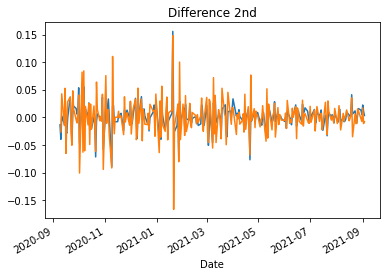

In [13]:
# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# ÌòπÏãú ÌïÑÏöîÌïú Í≤ΩÏö∞ 2Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

In [27]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  224
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 526.421
Method:                       css-mle   S.D. of innovations              0.023
Date:                Tue, 07 Sep 2021   AIC                          -1046.842
Time:                        10:22:57   BIC                          -1036.607
Sample:                             1   HQIC                         -1042.711
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.684e-05      0.001      0.057      0.954      -0.003       0.003
ar.L1.D.Close    -0.1494      0.066     -2.264      0.024      -0.279      -0.020
                                    Root

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

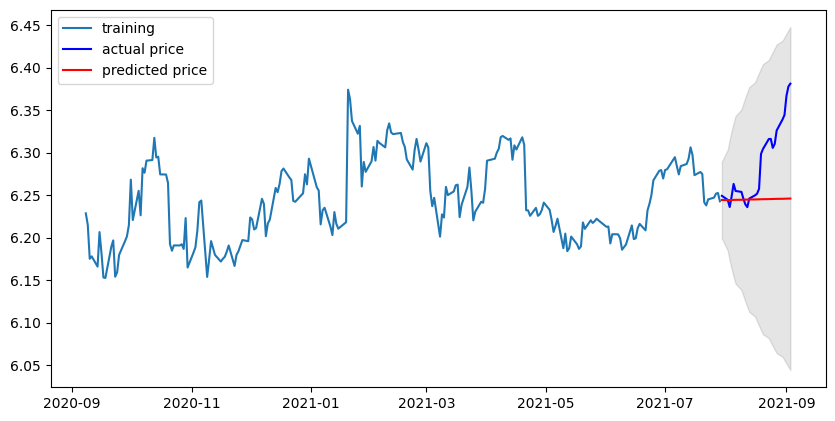

In [28]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1137.6862032107447
MAE:  23.540680179551018
RMSE:  33.729604255175374
MAPE: 4.18%


Î™®ÏàòÎ•º ÌïúÎ≤à Î∞îÍøîÎ≥¥Í≤†ÏäµÎãàÎã§.

[Ï∞∏Í≥†](https://data-newbie.tistory.com/39)

Î™®ÌòïÏùò ÏãùÎ≥ÑÏóêÏÑú  P,Q Î•º Í∞ÑÍ≤∞Ïùò ÏõêÏπôÏúºÎ°ú Ïù∏Ìï¥ P <3 , Q < 3ÏúºÎ°ú ÏÑ†ÌÉùÌïòÎäî Í≤ÉÏù¥ Í∞ÄÏû• Ï¢ãÎã§
Î™®Ìòï Í∞úÏàòÍ∞Ä Ï¶ùÍ∞ÄÌïòÎ©¥ ÏòàÏ∏° Î™®ÌòïÏù¥ Î≥µÏû°Ìï¥Ïßà Îøê ÏïÑÎãàÎùº Ï∂îÏ†ïÏùò Ìö®Ïú®ÏÑ±ÎèÑ Îñ®Ïñ¥ÏßÄÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§. 
Í∑∏ÎûòÏÑú Ïõ¨ÎßåÌïòÎ©¥ Î™®ÏàòÏùò Í∞úÏàòÍ∞Ä Ï†ÅÏùÄ Î™®ÌòïÏù¥ Ï¢ãÎã§.

p=1, d=1, q=1

In [27]:
from statsmodels.tsa.arima_model import ARIMA
# Build Model
model = ARIMA(train_data, order=(1, 1, 1))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  224
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 529.976
Method:                       css-mle   S.D. of innovations              0.023
Date:                Tue, 07 Sep 2021   AIC                          -1051.952
Time:                        11:36:09   BIC                          -1038.305
Sample:                             1   HQIC                         -1046.444
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      0.889      0.374      -0.000       0.000
ar.L1.D.Close     0.8748      0.033     26.145      0.000       0.809       0.940
ma.L1.D.Close    -1.0000      0.016    -

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


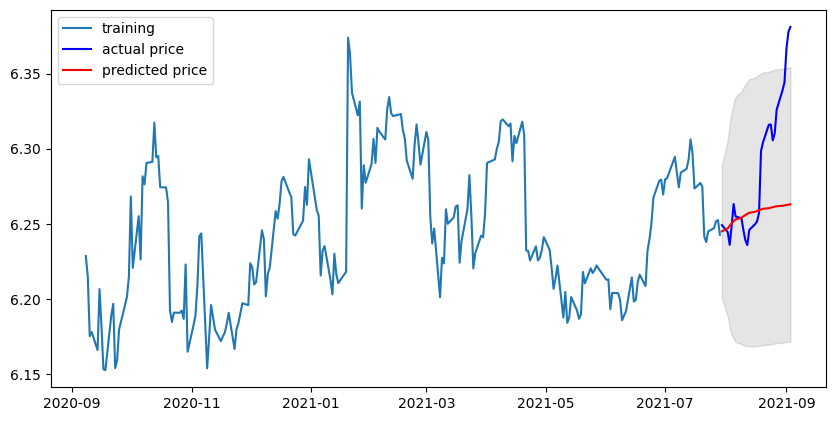

In [28]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  810.7808147407894
MAE:  19.979585034934537
RMSE:  28.474213154023932
MAPE: 3.55%


## 3) Naver

In [30]:
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/new_data/naver.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2020-09-07    314500.0
2020-09-08    311000.0
2020-09-09    304500.0
2020-09-10    307500.0
2020-09-11    306000.0
Name: Close, dtype: float64

In [31]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
# Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎã§Î©¥ Ïù¥Î•º Î≥¥Í∞ÑÌïòÍ∏∞, Î≥¥Í∞Ñ Í∏∞Ï§ÄÏùÄ timeÏùÑ ÏÑ†ÌÉù
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•

Series([], Name: Close, dtype: float64)

In [32]:
# Î°úÍ∑∏ Î≥ÄÌôò ÏãúÎèÑ 
ts_log = np.log(ts)

In [35]:
augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -0.376075
p-value                          0.914017
#Lags Used                       0.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


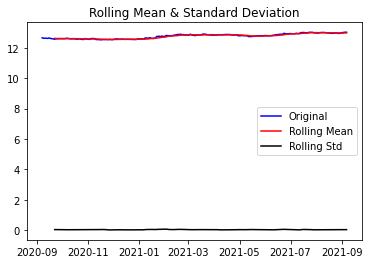

Results of Dickey-Fuller Test:
Test Statistic                  -0.350788
p-value                          0.917997
#Lags Used                       2.000000
Number of Observations Used    245.000000
Critical Value (1%)             -3.457326
Critical Value (5%)             -2.873410
Critical Value (10%)            -2.573096
dtype: float64


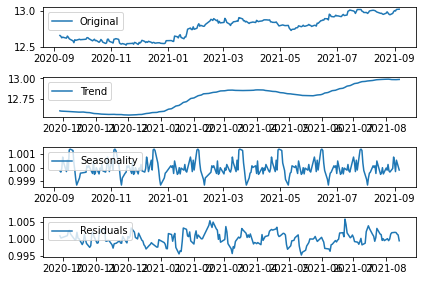

In [36]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
plot_rolling_statistics(ts_log, window=12)

#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [37]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.629220e+00
p-value                        5.771542e-09
#Lags Used                     1.000000e+00
Number of Observations Used    2.160000e+02
Critical Value (1%)           -3.460992e+00
Critical Value (5%)           -2.875016e+00
Critical Value (10%)          -2.573952e+00
dtype: float64


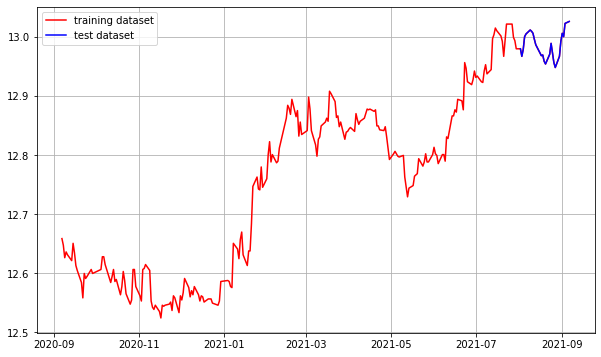

In [38]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

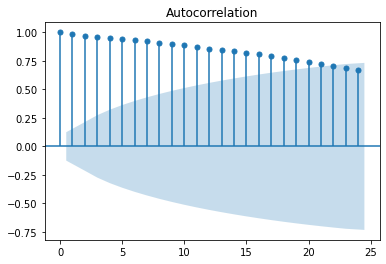

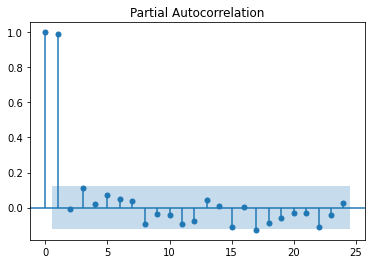

In [39]:
plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.269325e+01
p-value                        1.120256e-23
#Lags Used                     1.000000e+00
Number of Observations Used    2.450000e+02
Critical Value (1%)           -3.457326e+00
Critical Value (5%)           -2.873410e+00
Critical Value (10%)          -2.573096e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -6.945369e+00
p-value                        1.000415e-09
#Lags Used                     1.600000e+01
Number of Observations Used    2.290000e+02
Critical Value (1%)           -3.459233e+00
Critical Value (5%)           -2.874245e+00
Critical Value (10%)          -2.573541e+00
dtype: float64


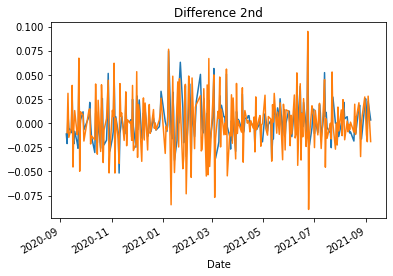

In [40]:
# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# ÌòπÏãú ÌïÑÏöîÌïú Í≤ΩÏö∞ 2Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

In [42]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  222
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 545.646
Method:                       css-mle   S.D. of innovations              0.021
Date:                Tue, 07 Sep 2021   AIC                          -1085.292
Time:                        10:31:41   BIC                          -1075.084
Sample:                             1   HQIC                         -1081.170
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0014      0.001      1.072      0.284      -0.001       0.004
ar.L1.D.Close    -0.0285      0.067     -0.426      0.670      -0.160       0.103
                                    Root

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

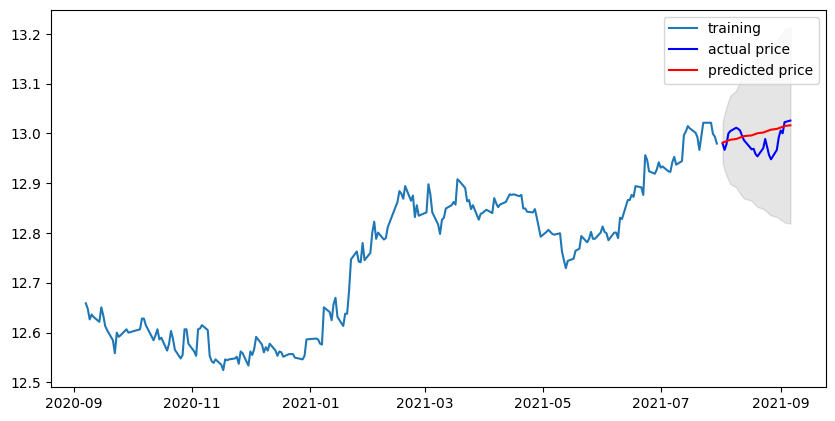

In [43]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  136749736.94864967
MAE:  9598.722259287522
RMSE:  11694.004316257528
MAPE: 2.23%


15%ÎØ∏ÎßåÏúºÎ°ú ÎÇòÏôîÎã§.

# üåüÎ£®Î∏åÎ¶≠

|ÌèâÍ∞ÄÎ¨∏Ìï≠|ÏÉÅÏÑ∏Í∏∞Ï§Ä|
|:------|:------|
|1. ÏãúÍ≥ÑÏó¥Ïùò ÏïàÏ†ïÏÑ±Ïù¥ Ï∂©Î∂ÑÌûà ÌôïÏù∏ÎêòÏóàÎäîÍ∞Ä?|ÌîåÎ°úÌåÖÍ≥º adfuller Î©îÏÜåÎìúÍ∞Ä Î™®Îëê Ï†ÅÏ†àÌûà ÏÇ¨Ïö©ÎêòÏóàÏùå|
|2. ARIMA Î™®Îç∏ Î™®ÏàòÏÑ†ÌÉù Í∑ºÍ±∞Î•º Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú Ï†úÏãúÌïòÏòÄÎäîÍ∞Ä?|p,qÎ•º ÏúÑÌïú ACF, PACF ÏÇ¨Ïö©Í≥º dÎ•º ÏúÑÌïú Ï∞®Î∂Ñ Í≥ºÏ†ïÏù¥ Î™ÖÌôïÌûà Ï†úÏãúÎê®|
|3. ÏòàÏ∏° Î™®Îç∏Ïùò Ïò§Ï∞®Ïú®Ïù¥ Í∏∞Ï§Ä Ïù¥ÌïòÎ°ú Ï†ïÌôïÌïòÍ≤å ÎÇòÏôîÎäîÍ∞Ä?|3Í∞ú Ïù¥ÏÉÅ Ï¢ÖÎ™©Ïù¥ MAPE 15% ÎØ∏ÎßåÏùò Ï†ïÌôïÎèÑÎ°ú ÏòàÏ∏°Îê®|

# üåü ÌöåÍ≥†

ÎÑ∑ÌîåÎ¶≠Ïä§Î°ú ÌñàÏùÑ Îïå 10%Ïù¥ÌïòÏòÄÍ∏¥ ÌïòÏßÄÎßå Î™®ÏàòÎ•º Î≥ÄÍ≤ΩÌï¥Î≥¥Î©¥ÏÑú Í∞íÏùÑ Ï§ÑÏó¨Î≥¥ÏïòÎã§.    
p=3, d=1, q=0ÏôÄ  p=2, d=1, q=1 Ïù¥Îü∞ÏãùÏúºÎ°ú Î∞îÍøîÎ≥¥ÏïòÍ≥†, 
p=1, d=1, q=1Ïùº Îïå ÏãúÎèÑÌñàÎçò Í≤ÉÎ≥¥Îã§ Ï¢Ä Îçî Í∞íÏù¥ Ï§ÑÏñ¥ÎìúÎäî Í≤ÉÏùÑ Î≥º Ïàò ÏûàÏóàÏùå.   
Ï£ºÏãùÏùÑ ÏòàÏ∏°ÌïúÎã§Îäî Í≤É ÏûêÏ≤¥Í∞Ä Ìù•ÎØ∏Î°úÏõ†Îçò explorationÏù¥ÏòÄÏßÄÎßå ARIMAÎùºÎçòÏßÄ Í∞úÎÖêÏ†ïÎ¶¨Í∞Ä Îçî ÌïÑÏöîÌïòÎã§Í≥† ÎäêÍºàÎã§.

## ‚úÖ ÎÇ¥Ïö© Ï∂îÍ∞Ä Ï†ïÎ¶¨

#### ARIMA (Autogressive Integrated Moving Average)
* ÎåÄÌëúÏ†ÅÏù∏ ÌÜµÍ≥ÑÏ†Å ÏãúÍ≥ÑÏó¥ ÏòàÏ∏° Î™®ÌòïÏúºÎ°ú, ÌòÑÏû¨Í∞íÏùÑ Í≥ºÍ±∞Í∞íÍ≥º Í≥ºÍ±∞ ÏòàÏ∏° Ïò§Ï∞®Î•º ÌÜµÌï¥ ÏÑ§Î™ÖÌïúÎã§.
* ARIMA Î™®ÌòïÏùÄ ÎπÑÏ†ïÏÉÅ ÏãúÍ≥ÑÏó¥ÏùÑ ÏÑ§Î™ÖÌïòÎ†§Îäî Î™®Ìòï
* ARMA Î™®ÌòïÏùÄ ÌèâÍ∑†ÏúºÎ°ú ÌöåÍ∑ÄÌïòÎèÑÎ°ù ÏòàÏ∏°ÌïòÎäîÎç∞ Î∞òÌï¥, ARIMA Î™®ÌòïÏùÄ Ï∂îÏÑ∏ Ï™ΩÏúºÎ°ú ÌöåÍ∑ÄÌïòÎèÑÎ°ù ÏòàÏ∏°
* Í≥ºÍ±∞Ïùò Îç∞Ïù¥ÌÑ∞Í∞Ä ÏßÄÎãàÍ≥† ÏûàÎçò 'Ï∂îÏÑ∏(Momentum)'ÍπåÏßÄ Î∞òÏòÅÌïúÎã§. 
* CorrelationÎøêÎßå ÏïÑÎãàÎùº CointegrationÍπåÏßÄ Í≥†Î†§Ìïú Î™®Îç∏Ïù¥Îã§.
    * CorrelationÏùÄ ÏÑúÎ°úÍ∞ÑÏóê ÏÑ†ÌòïÍ¥ÄÍ≥ÑÎ•º ÏÑ§Î™ÖÌïòÎäî Í≤ÉÏù¥ÎùºÎ©¥ CointegrationÏùÄ Ï∂îÏÑ∏Í¥ÄÍ≥ÑÎ•º ÏÑ§Î™ÖÌïúÎã§. Ï¶â, CointegrationÏù∏ ÏãúÏ†êÏù¥ Í≥†Î†§ÎêòÏßÄ ÏïäÏúºÎ©¥ ÏÑ±Î¶ΩÌïòÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ÏóêÎßå Ïì∞Ïù¥Îäî Í∞úÎÖêÏûÑ
    
#### AR(Autoregression) Î™®Îç∏
* ÏûêÍ∏∞ ÌöåÍ∑ÄÎ™®Îç∏Ïù¥ÎùºÍ≥† Î∂àÎ¶¨Îäî Î™®Îç∏Ïù¥Îã§. ÏûêÍ∏∞ ÏûêÏã†Ïùò Í≥ºÍ±∞Î•º ÏÇ¨Ïö©ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥Îü¨Ìïú Ïù¥Î¶ÑÏù¥ Î∂ôÏùÄ Í≤ÉÏù¥Îã§. Ïù¥Ï†ÑÏùò ÏûêÏã†Ïùò Í¥ÄÏ∏°Í∞íÏù¥ Ïù¥ÌõÑÏùò ÏûêÏã†Ïùò Í¥ÄÏ∏°Í∞íÏóê ÏòÅÌñ•ÏùÑ Ï§ÄÎã§Îäî ÏïÑÏù¥ÎîîÏñ¥Ïùò Î™®ÌòïÏù¥Îã§ (RNNÏùò ÏïÑÏù¥ÎîîÏñ¥ÏôÄ Îß§Ïö∞ Ïú†ÏÇ¨ÌïòÎã§). 

#### MA(Moving Average) Î™®Îç∏
* Ïù¥Îèô ÌèâÍ∑† Î™®Îç∏ÏùÄ Ìä∏Î†åÎìú(ÌèâÍ∑† ÌòπÏùÄ ÏãúÍ≥ÑÏó¥ Í∑∏ÎûòÌîÑÏóêÏÑúÏùò yÍ∞í)Í∞Ä Î≥ÄÌôîÌïòÎäî ÏÉÅÌô©ÏóêÏÑú Ï†ÅÌï©Ìïú ÌöåÍ∑ÄÎ™®Îç∏Ïù¥Îã§.

#### ARMA Î™®Ìòï
* ARMA Î™®ÌòïÏùÄ AR Î™®ÌòïÍ≥º MA Î™®ÌòïÏùÑ ÌòºÌï©Ìïú Î™®ÌòïÏù¥Îã§. ÌòÑÏû¨ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Îäî Í≥ºÍ±∞ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Îì§Í≥º Í≥ºÍ±∞ ÏûîÏ∞®Îì§Ïùò Ï°∞Ìï©ÏúºÎ°ú ÏÑ§Î™ÖÎêúÎã§Îäî Î™®ÌòïÏù¥Îã§.

[ARIMA Ï∞∏Í≥†1](https://leedakyeong.tistory.com/entry/ARIMA%EB%9E%80-ARIMA-%EB%B6%84%EC%84%9D%EA%B8%B0%EB%B2%95-AR-MA-ACF-PACF-%EC%A0%95%EC%83%81%EC%84%B1%EC%9D%B4%EB%9E%80)

[ARIMA Ï∞∏Í≥†2](https://m.blog.naver.com/bluefish850/220749045909)

[Ï∞∏Í≥†3](https://be-favorite.tistory.com/63)

[Ï∞∏Í≥†4](https://yamalab.tistory.com/112)

[Ï∞∏Í≥† 5](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=fininsight&logNo=221516817114)